**Importing the Data**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [75]:
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
diabetes.shape


(768, 9)

**Plotting the graph of labels**

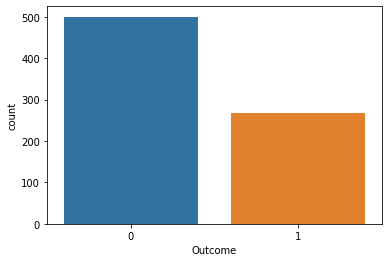

In [77]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

*   **Splitting the data**

*   **KNN MODEL**




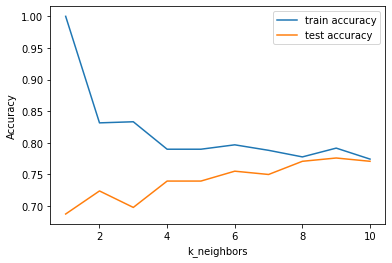

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
train_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
k_range= range(1, 11)
for n_neighbors in k_range:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(k_range, train_accuracy, label="train accuracy")
plt.plot(k_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [79]:
# the above plot suggest that taking k=9 gives best performamce
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


**Performamce of KNN**

In [80]:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Confusion matrix is : " )
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

Confusion matrix is : 
[[105  20]
 [ 23  44]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       125
           1       0.69      0.66      0.67        67

    accuracy                           0.78       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.77      0.78      0.77       192

0.7760416666666666


**Logistic Regression**

In [81]:
from sklearn.linear_model import LogisticRegression
#checking for c iterations
l_reg = LogisticRegression().fit(X_train, y_train)
l_reg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
l_reg100 = LogisticRegression(C=100).fit(X_train, y_train)
y_pred1 = l_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**Accuracy for differenct C values**

In [82]:
print(accuracy_score(y_test,l_reg.predict(X_test)))
print(accuracy_score(y_test,l_reg001.predict(X_test)))
print(accuracy_score(y_test,l_reg100.predict(X_test)))

0.7708333333333334
0.7604166666666666
0.78125


**Performance of Logistic Regression**

In [83]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Confusion matrix is : " )
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

Confusion matrix is : 
[[108  17]
 [ 27  40]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       125
           1       0.70      0.60      0.65        67

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.77      0.77       192

0.7708333333333334


**Plotting the graph for 3 different parameters**

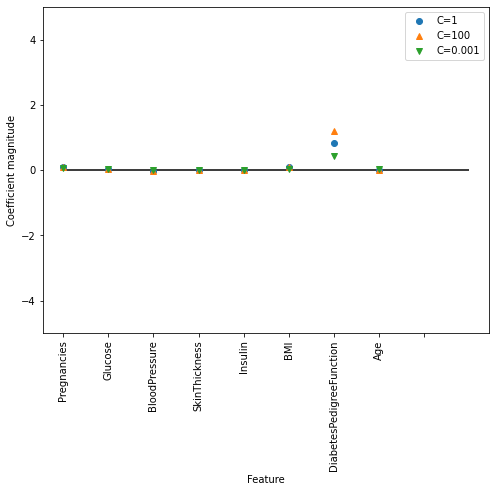

In [84]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(l_reg.coef_.T, 'o', label="C=1")
plt.plot(l_reg100.coef_.T, '^', label="C=100")
plt.plot(l_reg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

**Decision Tree**

In [85]:
from sklearn.tree import DecisionTreeClassifier
D_tree = DecisionTreeClassifier(random_state=0)
D_tree.fit(X_train, y_train)
y_pred2 = D_tree.predict(X_test)



**Performance of Decision Tree**

In [86]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Confusion matrix is : " )
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

Confusion matrix is : 
[[92 33]
 [22 45]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       125
           1       0.58      0.67      0.62        67

    accuracy                           0.71       192
   macro avg       0.69      0.70      0.70       192
weighted avg       0.73      0.71      0.72       192

0.7135416666666666


**Plotting graph for features Importance**

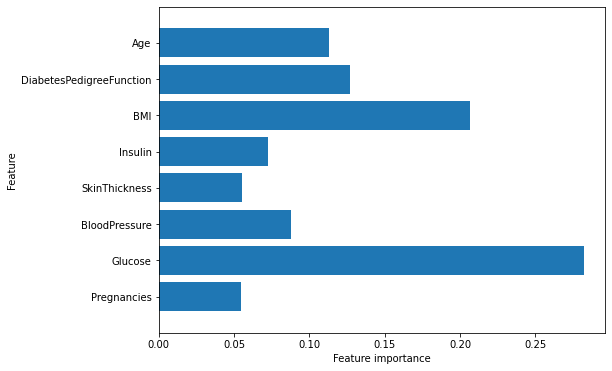

In [87]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(D_tree)
plt.savefig('feature_importance')

**Random Forest**

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_test)



**Performance of Random Forest**

In [89]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Confusion matrix is : " )
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

Confusion matrix is : 
[[106  19]
 [ 22  45]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       125
           1       0.70      0.67      0.69        67

    accuracy                           0.79       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.78      0.79      0.79       192

0.7864583333333334


**Plotting graph for features Importance**

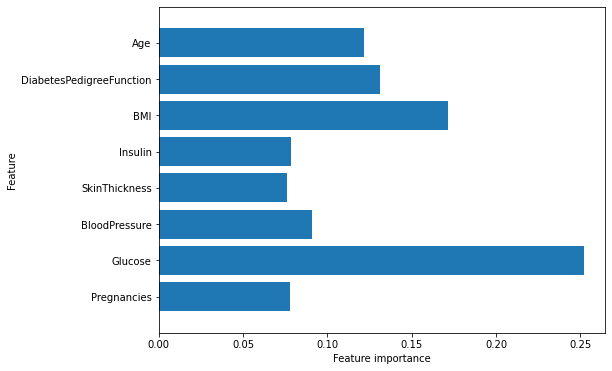

In [90]:
plot_feature_importances_diabetes(rf)


**Saving all the models**

In [91]:
import pickle 

KNN_file= open('1107178_KNN.pkl', 'wb') 
logistic_file= open('1107178_logistic.pkl', 'wb') 
decisiontree_file= open('1107178_decisiontree.pkl', 'wb') 
randomforest_file= open('1107178_randomforest.pkl', 'wb') 


# source, destination 
pickle.dump(knn, KNN_file) 
pickle.dump(l_reg, logistic_file)                      
pickle.dump(D_tree, decisiontree_file)                      
pickle.dump(rf, randomforest_file)                      

